# Description

En une heure, vous découvrirez les réseaux de neurones convolutifs (CNNs). On construira ensemble un modèle qui classifie les images.

Vous comprendrez l'intuition derrière les réseaux de neurones convolutifs.

Nous utiliserons des outils modernes, tels que TensorFlow, Keras et Google Colab. Aucune installation de logiciel requise !

Le domaine de l'Intelligence Artificielle est en pleine croissance et connaît une forte accélération depuis quelques années. Le Deep Learning est une branche du Machine Learning. Contrairement aux algorithmes classiques du Machine Learning, les systèmes de deep learning peuvent améliorer leurs performances en accédant à davantage de données : une machine plus expérimentée. La classification des images est d'une grande importance dans divers applications.

Le cours a porté sur les aspects théoriques et pratiques. Vous comprendrez comment utiliser des outils tels que TensorFlow et Keras pour créer de puissants modèles de Deep Learning. Les leçons sont pratiques, efficaces et organisées en petites étapes.

Les réseaux de neurones convolutifs (désignés par l’acronyme CNN, de l’anglais Convolutional Neural Networks) sont à ce jour les modèles les plus performants pour classer des images. Les réseaux de neurones convolutifs sont utilisés pour les voitures autonomes, les caméras intelligentes et les smartphones en raison de leurs performances impressionnantes. Les réseaux de neurones convolutifs sont reconnus comme étant la référence pour la classification, la détection et la segmentation des images.

Dans ce cours, nous créerons un réseau de neurones convolutifs pour reconnaître et classer des images en dix catégories.



In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import datasets  #importer les datasets

In [5]:
from tensorflow.keras import layers #importer les couches

In [6]:
from tensorflow.keras import models #pour évaluer le models

In [7]:
import matplotlib.pyplot as plt #affichage graphique

L'ensemble de données CIFAR10

- CIFAR = l'institut canadien de recherche avancée
- 60000 images: 10 classes et 6000 images de chaque classe
- 2 sous-ensembles: un ensemble pour l'entrainement(50000 images) et un ensemble pour le test (10000 images)
-Taille 3x32x32 (des imagettes en couleurs RGB)

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  #labels renvoient aux classes

170498071/170498071 [==============================] - 2s 0us/step


In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0 #normaliser les images pour que chaque valeur de pixels soit entre 0 et 1

# Vérification de l'ensemble de donnée

In [10]:
class_names = ['avion','voiture', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion' ]

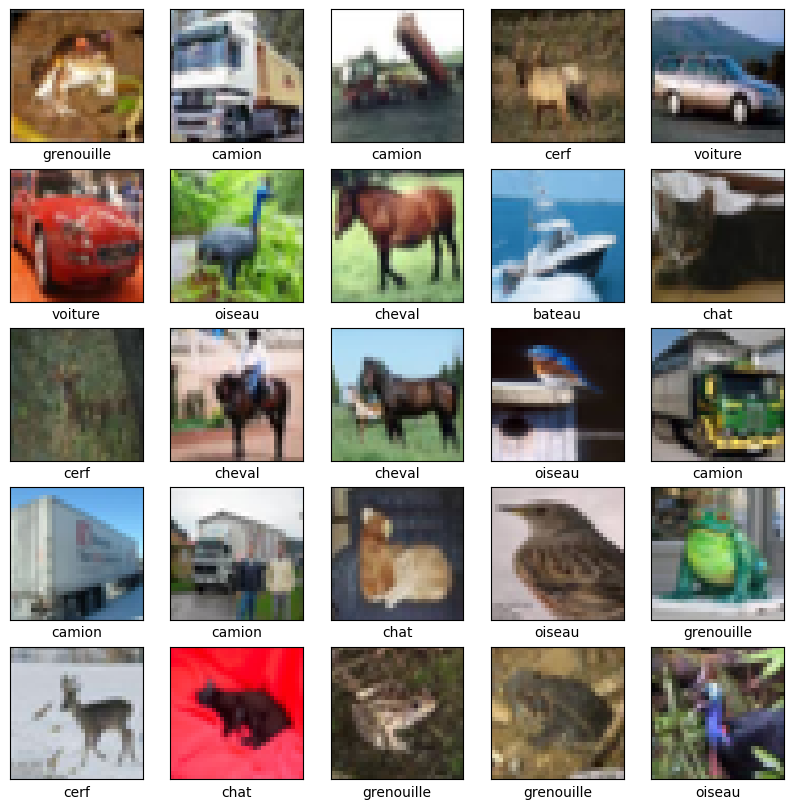

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)

  plt.xticks([])
  plt.yticks([])

  plt.imshow(train_images[i], cmap = plt.cm.binary)

  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

# Structure du CNN (Réseaux de neurones convolutionnels)


Un CNN se compose généralement des éléments suivants :

1. **Couche de Convolution :** Cette couche applique des filtres à l'image d'entrée pour extraire des caractéristiques importantes. Chaque filtre produit une carte d'activation en appliquant une opération de convolution à travers l'image.

2. **Couche ReLU (Rectified Linear Activation) :** Après chaque couche de convolution, une fonction d'activation ReLU est souvent appliquée pour introduire une non-linéarité dans le réseau. Cela aide à apprendre des représentations plus complexes.

3. **Couche de Pooling :** La couche de pooling (typiquement MaxPooling) réduit la dimension spatiale des cartes d'activation tout en préservant les caractéristiques les plus importantes. Cela réduit la complexité du modèle et aide à éviter le surajustement.

4. **Couche entièrement connectée (Fully Connected Layer) :** Après plusieurs couches de convolution et de pooling, les caractéristiques extraites sont aplaties et envoyées à une ou plusieurs couches entièrement connectées pour la classification ou la régression.

5. **Couche de sortie :** Cette couche finale fournit les prédictions du réseau. Elle peut comporter une seule unité pour la classification binaire ou plusieurs unités pour la classification multi-classes, ou même produire des valeurs continues pour des tâches de régression.

Voici un exemple simple de structure de CNN :

```
Couche de Convolution
Couche ReLU
Couche de Pooling
Couche de Convolution
Couche ReLU
Couche de Pooling
Couche entièrement connectée
Couche de sortie
```

Cette structure de base peut être étendue et modifiée en fonction de la complexité de la tâche et des données sur lesquelles le réseau est entraîné.

## Définition de la base convolutive

In [12]:
# création d'un modèle séquentiel à cause de la succesion de couche
model = models.Sequential()

#première couche convolutive
 #32 masque, filtre (3,3), fonction activation est un fonct. math. qui interviens sur les neuronnes dans un réseau
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

#couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

#une autre couche convolutive utilisant 64 masuqes
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#une autre couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

#une autre couche convolutive (3ième) utilisant 64 masuqes
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#couche fully-connected permet de classifier l'image en entrée du réseau, sortie applatie en 1D
model.add(layers.Flatten())

#02 couches denses
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [18]:
#compilation du modèle
#l'optimisation Adam aide le modèle à s'entrainer avec plus de stabilité
#La fonction loss calcule si le modèle a une prédiction correcte pour l'image/ fonction de perte
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.6109 - accuracy: 0.7864 - val_loss: 0.9302 - val_accuracy: 0.6957
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.5759 - accuracy: 0.7984 - val_loss: 0.9270 - val_accuracy: 0.7063
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5520 - accuracy: 0.8032 - val_loss: 0.8738 - val_accuracy: 0.7162
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5171 - accuracy: 0.8168 - val_loss: 0.9167 - val_accuracy: 0.7122
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4930 - accuracy: 0.8263 - val_loss: 0.9098 - val_accuracy: 0.7149
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4696 - accuracy: 0.8333 - val_loss: 0.9622 - val_accuracy: 0.7193
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4407 - accuracy: 0.8442 - val_loss: 1.0038 -

## Précision du modèle

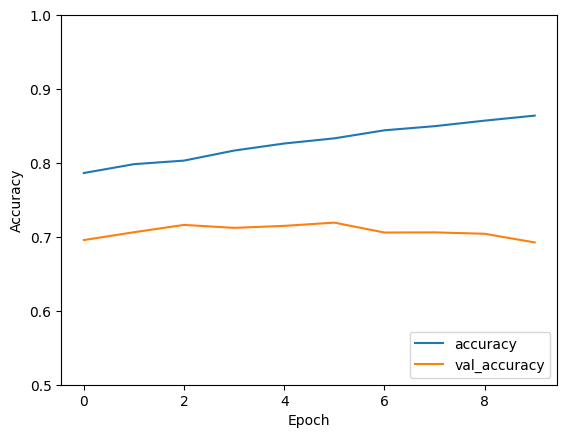

In [20]:
#calculons la precision du modèle

#history est le résultat pendant chaque épisodes de notre entrainement
plt.plot(history.history['accuracy'], label='accuracy')

#Tracons la precision
plt.plot(history.history['val_accuracy'], label='val_accuracy')

#Ajout des étiquettes aux axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#controle de la taille
plt.ylim([0.5, 1])
#aujout d'une légende
plt.legend(loc='lower right')


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

#notre modèle a classé 70% des images

313/313 [==============================] - 4s 12ms/step - loss: 1.1520 - accuracy: 0.6925
0.6924999952316284


## Autres méthodes de classification d'images:

-VGG19 (matériel special)

## Autres jeux de données:
-CIFAR 100
-MNIST
-ImageNet (matériel special)